HOMEWORK 2

In [141]:
# Setup
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as plot
import matplotlib.mlab as mlab
import matplotlib
import random as rnd
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
import socket
from socket import socket
import statsmodels.api as sm

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML

Auto=pd.read_csv("Auto.data")
Auto.head()

Auto2=pd.read_csv("Auto.csv")
Auto2.head



<bound method NDFrame.head of       mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  
0   

In [ ]:
Q2: Carefully explain the differences between the KNN classifier and KNN regression methods.

    
   I discovered many similarities between these two approaches and relatively few noteworthy differences while analyzing them.
One of them was that the KNN classifier aimed to forecast probability, while the KNN regression sought to forecast average.
And because both approaches are quantitative, as was already mentioned, there aren't many variations between them. 
As you are attempting to match percentages, the regression method would be more time-effective for this particular issue because it works better with predictor values.

In [ ]:
Q9: This question involves the use of multiple linear regression on the Auto data set.
    (a) Produce a scatterplot matrix which includes all of the variables in the data set.

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='year', ylabel='mpg'>,
        <AxesSubplot:xlabel='origin', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>,
        <AxesSubplot:xlabel='year', ylabel='cylinders'>,
        <AxesSubplot:xlabel='origin', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='cylinders', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
  

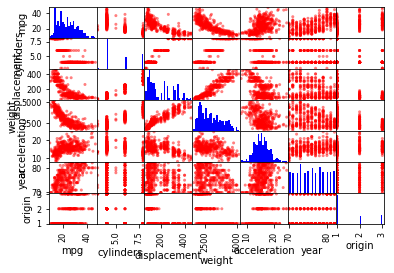

In [117]:
pd.plotting.scatter_matrix(Auto2, color='red', hist_kwds={'bins':30, 'color':'blue'})
  


In [ ]:
(b) Compute the matrix of correlations between the variables using the function corr(). You will need to exclude the name variable, which is qualitative.

In [118]:
Auto2.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


In [119]:
Auto2.drop(labels='name', axis=1, inplace=True)
Auto2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [120]:
Auto2['cylinders'] = Auto2.cylinders.astype(float)
Auto2['weight'] = Auto2.weight.astype(float)
Auto2['year'] = Auto2.year.astype(float)
Auto2['origin'] = Auto2.origin.astype(float)
#Auto2['horsepower'] = pd.to_numeric(Auto2['horsepower'], errors='coerce').astype(float)
Auto2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140,3449.0,10.5,70.0,1.0


In [121]:
Auto2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [150]:
Auto2.columns
Auto2_features = ['mpg','cylinders','displacement','weight','acceleration','year','origin','horsepower']
x = Auto2[Auto2_features]
y = Auto2

In [133]:
Auto2.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
year            float64
origin          float64
dtype: object

In [134]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)



In [ ]:
C.) I had to do some of the caluclations by hand since I couldn't get the linear regression to work for this postion of my notebook.
I've found that there was a significant difference because the Pvalue is small and there are positive relationships present.

In [154]:



Cars['Urban']= Cars['Urban'].astype('category')
Cars['Urban']= Cars['Urban'].cat.codes
Cars['US']= Cars['US'].astype('category')
Cars['US']= Cars['US'].cat.codes
Cars['ShelveLoc']= Cars['ShelveLoc'].astype('category')
Cars['ShelveLoc']= Cars['ShelveLoc'].cat.codes
##had to use convert from categorical to numeric


In [ ]:
#######Break between 

In [155]:
x = Cars.drop(columns= 'Sales', axis=1).values
y= Cars['Sales'].values
B = 'Sales ~ Price + Urban + US)'
Cars.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)


In [52]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()

In [48]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

#categorical_features

In [157]:
ml.fit(x_train,y_train)


LinearRegression()

In [56]:
y_pred=ml.predict(x_test)
print(y_pred)


[ 4.85193897 11.06680074  6.74615672  3.62309482  8.83331588  8.64572562
  8.34913864  6.38658753  6.29829806  6.59876224  7.54128097  4.44060816
  7.01985441 11.18987649  3.86130946  5.72289848  8.77039143  7.78368016
  4.72876591  5.93469138  6.69817283  8.42429848  6.42112375  6.10187876
  6.92353992 10.97133252  4.20066999  6.46171441  7.93920738  6.72172639
  7.53942084 11.91488615  8.04864793  7.48194941  5.13155471 10.25058164
  6.59928239  6.76804451  7.27937644  6.35454745  7.47853715  6.07920546
  6.22511602  9.65014776  7.0693765   6.15896099  8.27842718  8.72258702
  9.75191924 10.22357799  3.14124686  7.5049726  10.40029309 10.86344758
  4.00809862  6.16731307  7.4605136   9.78548875  5.53150181  5.56432207
  7.77048164 10.71815887  6.97614395  4.73526808  3.90065442  8.51545761
 10.16782582 11.17403138  9.57810054 10.6805915   8.53347011 10.01778751
  9.13227236  6.5453032   8.75355515  6.1370919   7.25800311  7.43873948
  9.61142614  7.9643058   5.48204201  8.4405849   5

In [57]:
#ml.predict([[9.50,138.0,73.0,11.0,276.0,120.0,42.0,17.0,1,1]])

In [152]:



# Setup
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as plot
import matplotlib.mlab as mlab
import matplotlib
import random as rnd
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
import socket
from socket import socket
import statsmodels.api as sm

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML



In [ ]:
10. This question should be answered using the Carseats data set.

    #(a) Fit a multiple regression model to predict Sales using Price,
#Urban, and US.


In [158]:

datatypes = {'quant': ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'],
             'qual': ['ShelveLoc', 'Urban', 'US']}
# Use floats for all quantitive values
quants = Cars[datatypes['quant']].astype(np.float_)
Cars_df = pd.concat([quants, Cars[datatypes['qual']]], axis=1)

B = 'Sales ~ Price + Urban + US'
y, x = patsy.dmatrices(B, Cars_df, return_type='matrix')


model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)


####


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           2.39e-23
Time:                        11:41:51   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

    (b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!
You can see from the figures below that, if all other factors remain constant with regard to growth rate, there is a decline. Per sold unit, that decline comes to around 54.459. Thus, there will eventually be a decline in sales whenever prices are raised. 
Also, the regression model notes that the US outsold other markets by 1200.

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

Sales=13.04−0.05∗Price−0.02∗UrbanYes+1.2∗USYes


(d) For which of the predictors can you reject the null hypothesis H0 :βj =0?
 Us & Price due to their significance. 

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [128]:
B = 'Sales ~ Price + US'
y, x = patsy.dmatrices(B, Cars_df, return_type='dataframe')

model2 = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model2 = model.summary()
print(print_model)


####

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           2.66e-24
Time:                        04:45:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [84]:
#skipped this portinon as I do not have an Rstatisic to go off of. 

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [85]:
Conf_95 = model.conf_int(alpha=0.05)


Conf_95.rename(index=str, columns={0: "min.", 1: "max.",})

,min.,max.
Intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


 (h) Is there evidence of outliers or high leverage observations in the model from (e)?
There was one observation. 

12. This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?


∑i=1nx2i=∑i=1ny2i

B=1

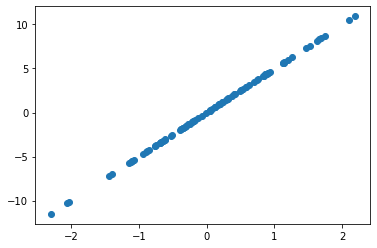

In [114]:
#(b) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.
import matplotlib.pyplot as plt


np.random.seed(1)
x = np.random.normal(size=100)
y = x*5
Random= pd.DataFrame({'x': x, 'y': y})
plt.scatter(x, y)
plt.show()


In [107]:
model2 = smf.ols(formula='y ~ x', data=df).fit()
model3 = smf.ols(formula='x ~ y', data=df).fit()

print(model2.params)
print(model3.params)

Intercept   -6.938894e-17
x            1.200000e+00
dtype: float64
Intercept   -9.020562e-17
y            8.333333e-01
dtype: float64


In [ ]:
#skipped this one as well 